In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from scipy import stats

## Barcelona state of things  - A perspective of the relation between income and rent prices

### How's the household income classified by neighbourhood and level? What's the trend in Barcelona?

In [2]:
# Importing household income dataset. The base index is Barcelona = 100
household_index = pd.read_csv('../new_data/2007_2017_distribucio_renda_familiar_index.csv')

In [3]:
household_index.head()

,Neighbourhoods,Unnamed: 1,Unnamed: 2,Unnamed: 3,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,BARCELONA,NaN,NaN,NaN,100,100,100,100,100,100,100,100,100,100,100
1,1 1. el Raval,NaN,NaN,NaN,"64,7","62,6",62,62,65,"65,4","60,3","65,9","75,8","74,6","71,2"
2,1 2. el Barri Gòtic,NaN,NaN,NaN,"86,5","80,8","94,3","92,3","98,8","99,7","103,6","98,5","108,5","110,5","106,1"
3,1 3. la Barceloneta,NaN,NaN,NaN,"66,7","65,9","64,4","72,6","73,1",69,"82,1","84,5","76,6","84,8","79,6"
4,1 4. Sant Pere - Santa Caterina i la Ribera,NaN,NaN,NaN,"80,2","81,8","88,8","91,2","86,1","89,3","91,2","92,5","96,4","97,8","99,4"


In [4]:
household_index.columns

Index(['Neighbourhoods', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

In [5]:
# Dropping 3 unnamed columns
cols = ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']

household_index.drop(cols, inplace=True, axis=1)

In [6]:
household_index.drop(household_index.index[0], inplace=True)

household_index1 = household_index.reset_index(drop=True)

In [7]:
household_index1

,Neighbourhoods,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1 1. el Raval,"64,7","62,6",62,62,65,"65,4","60,3","65,9","75,8","74,6","71,2"
1,1 2. el Barri Gòtic,"86,5","80,8","94,3","92,3","98,8","99,7","103,6","98,5","108,5","110,5","106,1"
2,1 3. la Barceloneta,"66,7","65,9","64,4","72,6","73,1",69,"82,1","84,5","76,6","84,8","79,6"
3,1 4. Sant Pere - Santa Caterina i la Ribera,"80,2","81,8","88,8","91,2","86,1","89,3","91,2","92,5","96,4","97,8","99,4"
4,2 5. el Fort Pienc,"107,9","108,3","109,1","108,5","97,9",98,99,"104,5","104,8",105,"106,5"
...,...,...,...,...,...,...,...,...,...,...,...,...
68,10 69. Diagonal Mar i el Front Marítim del Pob...,"101,1","104,4","107,9","106,8","122,3","127,4","150,1","168,8","162,5","152,6","150,1"
69,10 70. el Besòs i el Maresme,"61,7","61,1","53,7","53,6","52,9","52,4",53,"58,9","54,4","54,7","60,4"
70,10 71. Provençals del Poblenou,"85,7","85,1","82,4","77,1","84,3","80,4","76,1","91,7","102,8","98,7","102,3"
71,10 72. Sant Martí de Provençals,"81,5","80,3","76,6","74,9",65,"63,5","66,2","67,6","68,3","68,7","67,4"


In [8]:
# Setting the years columns as a value for each row
household_grouped = household_index1.melt(id_vars=['Neighbourhoods'], 
        var_name="Year", 
        value_name="Annual_income")

household_grouped

,Neighbourhoods,Year,Annual_income
0,1 1. el Raval,2007,"64,7"
1,1 2. el Barri Gòtic,2007,"86,5"
2,1 3. la Barceloneta,2007,"66,7"
3,1 4. Sant Pere - Santa Caterina i la Ribera,2007,"80,2"
4,2 5. el Fort Pienc,2007,"107,9"
...,...,...,...
798,10 69. Diagonal Mar i el Front Marítim del Pob...,2017,"150,1"
799,10 70. el Besòs i el Maresme,2017,"60,4"
800,10 71. Provençals del Poblenou,2017,"102,3"
801,10 72. Sant Martí de Provençals,2017,"67,4"


In [9]:
household_grouped1 = household_grouped.stack().str.replace(',','.').unstack()


In [10]:
household_grouped1.dtypes

Neighbourhoods    object
Year              object
Annual_income     object
dtype: object

In [11]:
# Convert Monthly_income column to float
household_grouped1['Annual_income'] = household_grouped1.Annual_income.astype(float)

In [12]:
household_grouped1['Annual_income'].sort_values()

711     34.3
638     34.5
563     34.7
636     35.6
595     36.9
       ...  
458    243.9
312    246.0
750    248.8
604    250.5
531    251.7
Name: Annual_income, Length: 803, dtype: float64

In [13]:
# Let's analyze the income per neighbourhood binning it in 5 levels: Low, Lower Middle, Middle, Upper Middle, High
# To do that, let's take as a reference the year 2007 to see how much it has grown or decreased based on this initial stage.
# Since we want to divide in 5 groups the proper statically way will be assign as a threshold for each level the correspondant quartile for the income.

df_bin = household_grouped1[household_grouped1['Year'] == '2007']
bin_list = df_bin['Annual_income'].to_list()

In [14]:
print("Q1 quantile of arr : ", np.quantile(bin_list, 0.25)) 
print("Q2 quantile of arr : ", np.quantile(bin_list, 0.50)) 
print("Q3 quantile of arr : ", np.quantile(bin_list, 0.75)) 
print("Q4 quantile of arr : ", np.quantile(bin_list, 1)) 

Q1 quantile of arr :  74.8
Q2 quantile of arr :  86.5
Q3 quantile of arr :  103.5
Q4 quantile of arr :  215.3


In [15]:
# Let's assign the threshold for each level

conditions = [
    (household_grouped1['Annual_income'] <= 74.8),
    (household_grouped1['Annual_income'] > 74.8) & (household_grouped1['Annual_income'] <= 86.5),
    (household_grouped1['Annual_income'] > 86.5) & (household_grouped1['Annual_income'] <= 105.5),
    (household_grouped1['Annual_income'] > 103.5) & (household_grouped1['Annual_income'] < 215.3),
    (household_grouped1['Annual_income'] >= 215.3)
    ]

# Creating a list of the values we want to assign for each condition
values = ['Low', 'Lower Middle', 'Middle', 'Upper Middle', 'High']

# Creating a new column and use np.select to assign values to it using our lists as arguments
household_grouped1['Income_level'] = np.select(conditions, values)

household_grouped1.head()

,Neighbourhoods,Year,Annual_income,Income_level
0,1 1. el Raval,2007,64.7,Low
1,1 2. el Barri Gòtic,2007,86.5,Lower Middle
2,1 3. la Barceloneta,2007,66.7,Low
3,1 4. Sant Pere - Santa Caterina i la Ribera,2007,80.2,Lower Middle
4,2 5. el Fort Pienc,2007,107.9,Upper Middle


In [16]:
household_grouped1['Year'] = pd.DatetimeIndex(household_grouped1['Year']).year

In [17]:
household_grouped1

,Neighbourhoods,Year,Annual_income,Income_level
0,1 1. el Raval,2007,64.7,Low
1,1 2. el Barri Gòtic,2007,86.5,Lower Middle
2,1 3. la Barceloneta,2007,66.7,Low
3,1 4. Sant Pere - Santa Caterina i la Ribera,2007,80.2,Lower Middle
4,2 5. el Fort Pienc,2007,107.9,Upper Middle
...,...,...,...,...
798,10 69. Diagonal Mar i el Front Marítim del Pob...,2017,150.1,Upper Middle
799,10 70. el Besòs i el Maresme,2017,60.4,Low
800,10 71. Provençals del Poblenou,2017,102.3,Middle
801,10 72. Sant Martí de Provençals,2017,67.4,Low


In [18]:
# Get rid of numbers preceding the neigbourhoods column 
household_grouped1['Hoods'] = household_grouped1['Neighbourhoods'].str.extract(r'([A-Za-z]+\D\D+)', expand=False).str.strip()
household_grouped1.drop(['Neighbourhoods'], axis=1, inplace=True)

In [19]:
# Reindexing columns
household_grouped2 = household_grouped1.reindex(columns=['Hoods', 'Year', 'Annual_income', 'Income_level'])

household_grouped2.columns = ['Neighbourhoods', 'Year', 'Annual_income', 'Income_level']

In [20]:
household_grouped2

,Neighbourhoods,Year,Annual_income,Income_level
0,el Raval,2007,64.7,Low
1,el Barri Gòtic,2007,86.5,Lower Middle
2,la Barceloneta,2007,66.7,Low
3,Sant Pere - Santa Caterina i la Ribera,2007,80.2,Lower Middle
4,el Fort Pienc,2007,107.9,Upper Middle
...,...,...,...,...
798,Diagonal Mar i el Front Marítim del Poblenou,2017,150.1,Upper Middle
799,el Besòs i el Maresme,2017,60.4,Low
800,Provençals del Poblenou,2017,102.3,Middle
801,Sant Martí de Provençals,2017,67.4,Low


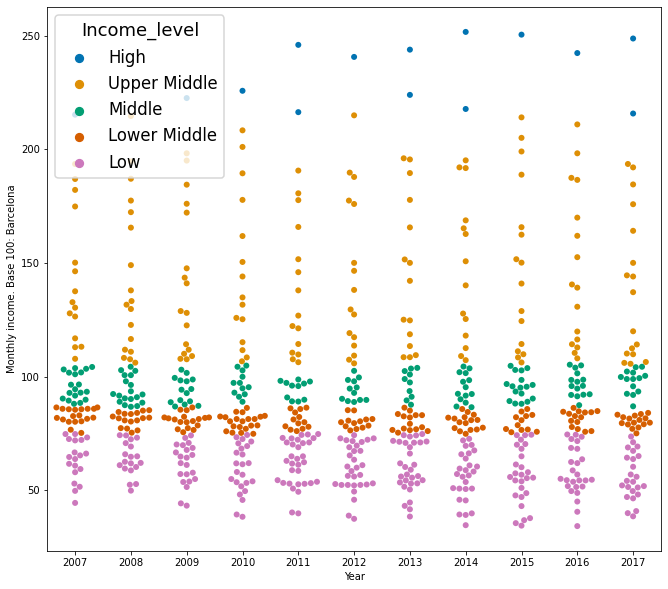

In [21]:
fig1,ax1 = plt.subplots(figsize=(11,10))
sns.set_context("talk")

sns.swarmplot(x='Year', y='Annual_income', hue='Income_level', 
              hue_order=['High', 'Upper Middle', 'Middle','Lower Middle', 'Low'], 
              data=household_grouped2, size=6, ax = ax1, palette='colorblind')

plt.ylabel('Monthly income. Base 100: Barcelona')

fig1.savefig("../figures/dist_income_levels1.png") 

#### Here's how distributed was the percentage in terms of level of income at 2007 and 2017

In [22]:
household_grouped2

,Neighbourhoods,Year,Annual_income,Income_level
0,el Raval,2007,64.7,Low
1,el Barri Gòtic,2007,86.5,Lower Middle
2,la Barceloneta,2007,66.7,Low
3,Sant Pere - Santa Caterina i la Ribera,2007,80.2,Lower Middle
4,el Fort Pienc,2007,107.9,Upper Middle
...,...,...,...,...
798,Diagonal Mar i el Front Marítim del Poblenou,2017,150.1,Upper Middle
799,el Besòs i el Maresme,2017,60.4,Low
800,Provençals del Poblenou,2017,102.3,Middle
801,Sant Martí de Provençals,2017,67.4,Low


In [23]:
household_grouped2[household_grouped2['Year'] == 2007].groupby('Income_level')['Annual_income'].count()

Income_level
High             1
Low             19
Lower Middle    19
Middle          19
Upper Middle    15
Name: Annual_income, dtype: int64

In [24]:
income_level_2007 = (household_grouped2[household_grouped2['Year'] == 2007].groupby('Income_level')['Annual_income'].count())

In [25]:
income_level_2017 = (household_grouped2[household_grouped2['Year'] == 2017].groupby('Income_level')['Annual_income'].count())

In [26]:
income_level_2007_perc = income_level_2007/(income_level_2007.sum())
income_level_2017_perc = income_level_2017/(income_level_2017.sum())

In [27]:
income_level_2007_perc1 = pd.DataFrame(income_level_2007_perc)

In [28]:
income_level_2007_perc2 = income_level_2007_perc1.reset_index()
income_level_2007_perc2.columns = ['Income_level','Annual_income_2007']

In [29]:
income_level_2017_perc1 = pd.DataFrame(income_level_2017_perc)

In [30]:
income_level_2017_perc2 = income_level_2017_perc1.reset_index()
income_level_2017_perc2.columns = ['Income_level','Annual_income_2017']

In [31]:
income_evolution = income_level_2007_perc2.merge(income_level_2017_perc2, how='right', left_on='Income_level', right_on='Income_level')

In [32]:
income_evolution

,Income_level,Annual_income_2007,Annual_income_2017
0,High,0.013699,0.027397
1,Low,0.260274,0.328767
2,Lower Middle,0.260274,0.219178
3,Middle,0.260274,0.191781
4,Upper Middle,0.205479,0.232877


In [33]:
income_evol = income_evolution.fillna(0)

income_evol

,Income_level,Annual_income_2007,Annual_income_2017
0,High,0.013699,0.027397
1,Low,0.260274,0.328767
2,Lower Middle,0.260274,0.219178
3,Middle,0.260274,0.191781
4,Upper Middle,0.205479,0.232877


In [34]:
income_evol['Variation'] = (income_evol['Annual_income_2017'] - income_evol['Annual_income_2007'])/income_evol['Annual_income_2007']

In [35]:
income_evol

,Income_level,Annual_income_2007,Annual_income_2017,Variation
0,High,0.013699,0.027397,1.000000
1,Low,0.260274,0.328767,0.263158
2,Lower Middle,0.260274,0.219178,-0.157895
3,Middle,0.260274,0.191781,-0.263158
4,Upper Middle,0.205479,0.232877,0.133333


The numbers speak for themselves, there exists a polarization on income levels. If in 2007 Low, Lower Middle and Middle had the same rates, in 2017 the only one that grows is the Low one in a 26,3 %. 


Summarizing, people tend high-income neigbourhoods are getting more rich and working class ones are now poorer.



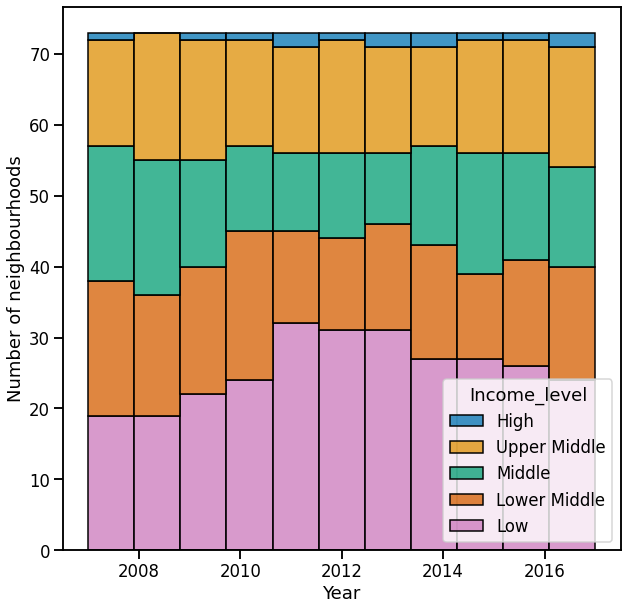

In [36]:
# Another way to visually look the evolution of the income per neighbourhood by income level.

fig2, ax2 = plt.subplots(figsize= (10,10))

sns.histplot(data = household_grouped2, x='Year',hue ='Income_level', multiple='stack'
            ,palette='colorblind', hue_order = ['High', 'Upper Middle', 'Middle','Lower Middle', 'Low'])

plt.ylabel('Number of neighbourhoods')

fig2.savefig("../figures/dist_income_levels2.png") 

### Rent price evolution per neighbourhood (2013-2019)

In [37]:
neighbourhood_rent = pd.read_csv('../new_data/_preu_lloguer_barris_2013_2019.csv')

In [38]:
neighbourhood_rent

,Codi,Barris,2019,2018,2017,2016,2015,2014,2013
0,NaN,Barcelona,978.81,929.57,877.28,801.28,734.94,688.23,681.56
1,1.0,el Raval,850.11,821.84,748.58,667.00,625.82,577.85,571.82
2,2.0,el Barri Gòtic,1097.29,1024.78,973.27,868.95,786.04,749.99,715.56
3,3.0,la Barceloneta,895.90,899.37,745.81,667.34,602.62,563.08,559.55
4,4.0,Sant Pere - Santa Caterina i la Ribera,996.35,972.07,916.65,807.26,723.45,685.14,659.16
...,...,...,...,...,...,...,...,...,...
69,69.0,Diagonal Mar i el Front Marítim del Poblenou,1372.38,1085.34,1092.06,1124.80,1059.75,892.03,914.10
70,70.0,el Besòs i el Maresme,738.08,685.56,613.03,541.25,506.71,477.06,510.80
71,71.0,Provençals del Poblenou,982.03,948.80,932.02,839.80,661.38,639.55,594.32
72,72.0,Sant Martí de Provençals,837.58,792.68,765.22,700.75,673.92,633.78,638.09


In [39]:
# Dropping the 'Codi' column
neighbourhood_rent.drop(['Codi'], axis=1, inplace=True)


In [40]:
# Deleting 1st row of each table
neighbourhood_rent.drop(neighbourhood_rent.index[0], inplace=True)
neighbourhood_rent.reset_index(drop=True)

,Barris,2019,2018,2017,2016,2015,2014,2013
0,el Raval,850.11,821.84,748.58,667.00,625.82,577.85,571.82
1,el Barri Gòtic,1097.29,1024.78,973.27,868.95,786.04,749.99,715.56
2,la Barceloneta,895.90,899.37,745.81,667.34,602.62,563.08,559.55
3,Sant Pere - Santa Caterina i la Ribera,996.35,972.07,916.65,807.26,723.45,685.14,659.16
4,el Fort Pienc,1012.41,950.32,900.42,823.45,768.12,723.33,718.31
...,...,...,...,...,...,...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,1372.38,1085.34,1092.06,1124.80,1059.75,892.03,914.10
69,el Besòs i el Maresme,738.08,685.56,613.03,541.25,506.71,477.06,510.80
70,Provençals del Poblenou,982.03,948.80,932.02,839.80,661.38,639.55,594.32
71,Sant Martí de Provençals,837.58,792.68,765.22,700.75,673.92,633.78,638.09


In [41]:
neighbourhood_rent.columns = ['Neighbourhoods', '2019', '2018', '2017', '2016', '2015', '2014', '2013']

In [42]:
neighbourhood_rent1 = neighbourhood_rent.reindex(columns=['Neighbourhoods', '2013', '2014', '2015', 
                                                          '2016', '2017', '2018', '2019'])

In [43]:
neighbourhood_rent1

,Neighbourhoods,2013,2014,2015,2016,2017,2018,2019
1,el Raval,571.82,577.85,625.82,667.00,748.58,821.84,850.11
2,el Barri Gòtic,715.56,749.99,786.04,868.95,973.27,1024.78,1097.29
3,la Barceloneta,559.55,563.08,602.62,667.34,745.81,899.37,895.90
4,Sant Pere - Santa Caterina i la Ribera,659.16,685.14,723.45,807.26,916.65,972.07,996.35
5,el Fort Pienc,718.31,723.33,768.12,823.45,900.42,950.32,1012.41
...,...,...,...,...,...,...,...,...
69,Diagonal Mar i el Front Marítim del Poblenou,914.10,892.03,1059.75,1124.80,1092.06,1085.34,1372.38
70,el Besòs i el Maresme,510.80,477.06,506.71,541.25,613.03,685.56,738.08
71,Provençals del Poblenou,594.32,639.55,661.38,839.80,932.02,948.80,982.03
72,Sant Martí de Provençals,638.09,633.78,673.92,700.75,765.22,792.68,837.58


In [44]:
neighbourhood_rent1.isna().sum()

Neighbourhoods    0
2013              3
2014              1
2015              0
2016              0
2017              1
2018              1
2019              0
dtype: int64

In [45]:
# Filling NaN values with the row mean to approximate the values to not distort reality
m = neighbourhood_rent1.mean(axis=1)
for i, col in enumerate(neighbourhood_rent1):
    neighbourhood_rent1.iloc[:, i] = neighbourhood_rent1.iloc[:, i].fillna(m)


In [46]:
neighbourhood_rent1.isna().sum()

Neighbourhoods    0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
dtype: int64

In [47]:
neighbourhood_rent1['Variation'] = (neighbourhood_rent1['2019'] - neighbourhood_rent1['2013'])/neighbourhood_rent1['2013']

In [48]:
neighbourhood_rent1.head()

,Neighbourhoods,2013,2014,2015,2016,2017,2018,2019,Variation
1,el Raval,571.82,577.85,625.82,667.00,748.58,821.84,850.11,0.486674
2,el Barri Gòtic,715.56,749.99,786.04,868.95,973.27,1024.78,1097.29,0.533470
3,la Barceloneta,559.55,563.08,602.62,667.34,745.81,899.37,895.90,0.601108
4,Sant Pere - Santa Caterina i la Ribera,659.16,685.14,723.45,807.26,916.65,972.07,996.35,0.511545
5,el Fort Pienc,718.31,723.33,768.12,823.45,900.42,950.32,1012.41,0.409433


In [49]:
# Importing district dataset to match to every neighbourhood
districts = pd.read_csv('../new_data/districtes_i_barris_170705.csv')

In [50]:
districts.drop(['CODI_DISTRICTE', 'CODI_BARRI'], axis=1, inplace=True)

districts.head()

,NOM_DISTRICTE,NOM_BARRI
0,Ciutat Vella,el Raval
1,Ciutat Vella,el Barri Gòtic
2,Ciutat Vella,la Barceloneta
3,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera
4,Eixample,el Fort Pienc


In [51]:
# Merging neighbourhood rent and district dataset
neighbourhood_district_rent = neighbourhood_rent1.merge(districts, how='left', left_on='Neighbourhoods', right_on='NOM_BARRI')

neighbourhood_district_rent.head()

,Neighbourhoods,2013,2014,2015,2016,2017,2018,2019,Variation,NOM_DISTRICTE,NOM_BARRI
0,el Raval,571.82,577.85,625.82,667.00,748.58,821.84,850.11,0.486674,Ciutat Vella,el Raval
1,el Barri Gòtic,715.56,749.99,786.04,868.95,973.27,1024.78,1097.29,0.533470,Ciutat Vella,el Barri Gòtic
2,la Barceloneta,559.55,563.08,602.62,667.34,745.81,899.37,895.90,0.601108,Ciutat Vella,la Barceloneta
3,Sant Pere - Santa Caterina i la Ribera,659.16,685.14,723.45,807.26,916.65,972.07,996.35,0.511545,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera
4,el Fort Pienc,718.31,723.33,768.12,823.45,900.42,950.32,1012.41,0.409433,Eixample,el Fort Pienc


In [52]:
neighbourhood_district_rent.drop(['NOM_BARRI'], axis=1, inplace=True)

# Reindexing columns
neighbourhood_district_rent1 = neighbourhood_district_rent.reindex(columns=['NOM_DISTRICTE','Neighbourhoods','2013', '2014', 
                                                                            '2015', '2016', '2017', '2018', '2019', 'Variation'])

neighbourhood_district_rent1.columns = ['Districts','Neighbourhoods','2013', '2014', 
                             '2015', '2016', '2017', '2018', '2019', 'Variation']

In [53]:
neighbourhood_district_rent1.head()

,Districts,Neighbourhoods,2013,2014,2015,2016,2017,2018,2019,Variation
0,Ciutat Vella,el Raval,571.82,577.85,625.82,667.00,748.58,821.84,850.11,0.486674
1,Ciutat Vella,el Barri Gòtic,715.56,749.99,786.04,868.95,973.27,1024.78,1097.29,0.533470
2,Ciutat Vella,la Barceloneta,559.55,563.08,602.62,667.34,745.81,899.37,895.90,0.601108
3,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,659.16,685.14,723.45,807.26,916.65,972.07,996.35,0.511545
4,Eixample,el Fort Pienc,718.31,723.33,768.12,823.45,900.42,950.32,1012.41,0.409433


In [54]:
# Let's have a look which are the neighbourhoods where the rent price has increased more since 2013 

top_10_hoods = neighbourhood_district_rent1.sort_values(by='Variation', ascending=False).head(10)
top_10_hoods

,Districts,Neighbourhoods,2013,2014,2015,2016,2017,2018,2019,Variation
57,Sant Andreu,Baró de Viver,244.03,241.15,287.39,216.41,458.37,621.01,486.20,0.992378
70,Sant Martí,Provençals del Poblenou,594.32,639.55,661.38,839.80,932.02,948.80,982.03,0.652359
2,Ciutat Vella,la Barceloneta,559.55,563.08,602.62,667.34,745.81,899.37,895.90,0.601108
29,Gràcia,la Salut,578.25,668.51,705.21,773.44,799.97,877.30,918.31,0.588085
1,Ciutat Vella,el Barri Gòtic,715.56,749.99,786.04,868.95,973.27,1024.78,1097.29,0.533470
3,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,659.16,685.14,723.45,807.26,916.65,972.07,996.35,0.511545
68,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,914.10,892.03,1059.75,1124.80,1092.06,1085.34,1372.38,0.501346
67,Sant Martí,el Poblenou,670.44,654.35,735.04,794.11,900.22,961.73,1004.72,0.498598
26,Sarrià-Sant Gervasi,el Putxet i el Farró,729.86,760.35,799.69,876.64,930.19,995.37,1086.42,0.488532
0,Ciutat Vella,el Raval,571.82,577.85,625.82,667.00,748.58,821.84,850.11,0.486674


In [55]:
bottom_10_hoods = neighbourhood_district_rent1.sort_values(by='Variation', ascending=True).head(10)
bottom_10_hoods

,Districts,Neighbourhoods,2013,2014,2015,2016,2017,2018,2019,Variation
11,Sants-Montjuïc,la Marina del Prat Vermell - AEI Zona Franca,378.540000,378.54,404.71,356.56,378.54,378.54,374.35,-0.011069
53,Nou Barris,Torre Baró,396.040000,334.46,404.92,412.60,425.64,512.49,471.76,0.191193
47,Nou Barris,la Guineueta,620.350000,614.56,562.81,623.36,650.05,714.86,744.16,0.199581
40,Horta-Guinardó,la Vall d'Hebron,704.380000,699.39,696.29,767.36,828.96,859.76,864.65,0.227533
55,Nou Barris,Vallbona,473.130000,281.71,415.08,469.73,476.43,613.86,581.97,0.230042
41,Horta-Guinardó,la Clota,531.141667,480.00,350.25,538.75,651.25,500.42,666.18,0.254242
60,Sant Andreu,la Sagrera,643.450000,607.04,636.60,665.59,667.56,780.89,817.35,0.270262
48,Nou Barris,Canyelles,587.260000,536.41,563.96,625.61,680.56,716.55,752.08,0.280659
46,Nou Barris,Can Peguera,324.820000,221.13,211.35,253.10,417.84,439.63,419.43,0.291269
35,Horta-Guinardó,la Font d'en Fargues,680.110000,712.41,723.54,717.41,817.10,828.28,885.61,0.302157


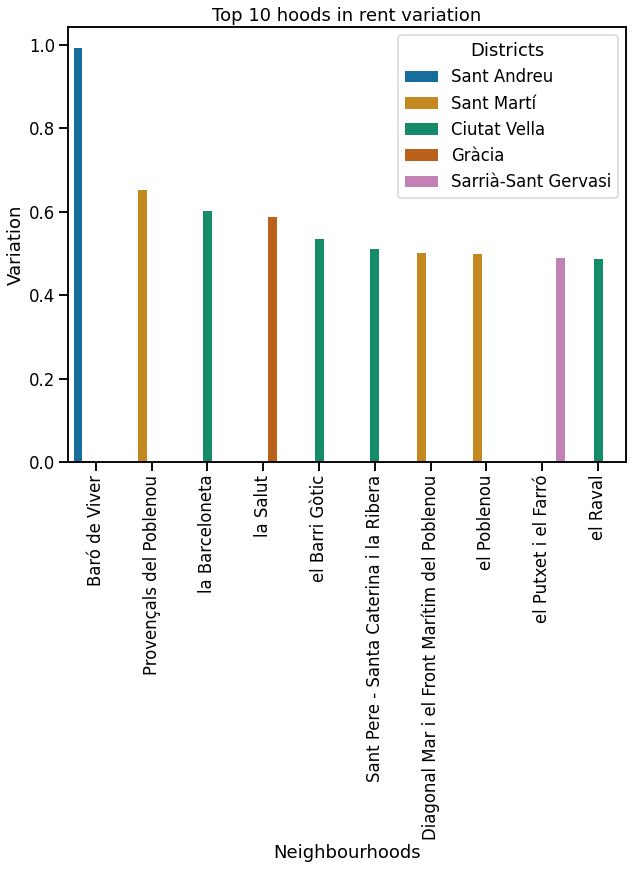

In [56]:
fig3, ax3 = plt.subplots(figsize=(10,8))

sns.barplot(x='Neighbourhoods', y='Variation', hue='Districts', 
            data=top_10_hoods, ax=ax3, palette='colorblind').set_title('Top 10 hoods in rent variation')

plt.xticks(rotation=90)
fig3.savefig("../figures/top_10_rent_variation.png") 

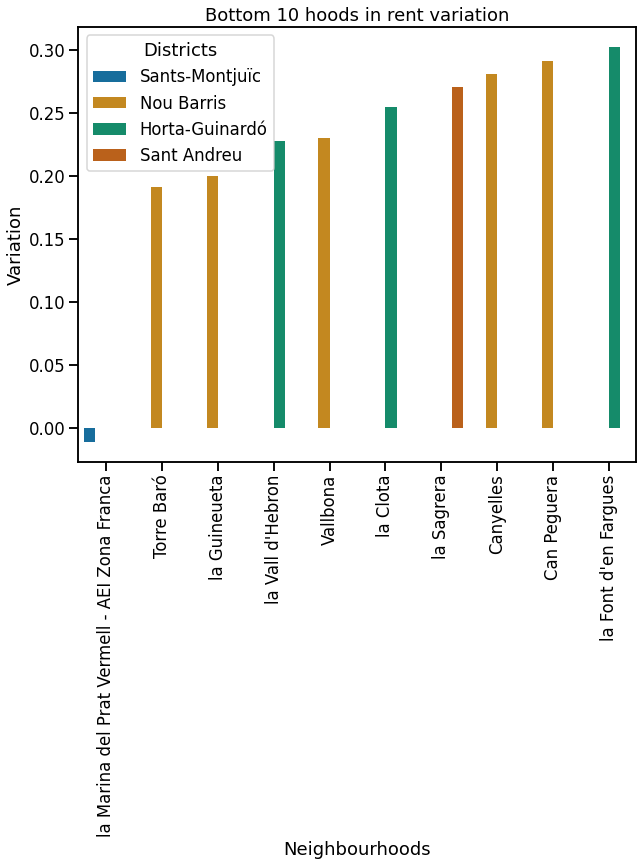

In [57]:
fig4, ax4 = plt.subplots(figsize=(10,8))

sns.barplot(x='Neighbourhoods', y='Variation', hue='Districts', 
            data=bottom_10_hoods, ax=ax4, palette='colorblind').set_title('Bottom 10 hoods in rent variation')

plt.xticks(rotation=90)
fig4.savefig("../figures/bottom_10_rent_variation.png") 

In [58]:
neighbourhood_rent1.to_csv('../csv_used/rent_evolution_by_neighbourhood_2013_2019.csv')

### State of the household income in 2017. Which are the richest and the poorest neighbourhoods? How big is the difference during time?

In [59]:
household_income = pd.read_csv('../new_data/_2008_2017_rfd_xifres.csv')

In [60]:
household_income

,Barris,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,BARCELONA,19367,18968,19602,20483,18912,18761,19335,19775,20757,21896
1,1 1. el Raval,12124,11760,12153,13314,12368,11313,12742,14989,15485,15590
2,1 2. el Barri Gòtic,15649,17887,18093,20237,18855,19436,19045,21456,22936,23232
3,1 3. la Barceloneta,12763,12215,14231,14973,13049,15403,16338,15148,17602,17429
4,1 4. Sant Pere - Santa Caterina i la Ribera,15842,16844,17877,17636,16888,17110,17885,19063,20300,21765
...,...,...,...,...,...,...,...,...,...,...,...
69,10 69. Diagonal Mar i el Front Marítim del Pob...,20219,20466,20935,25051,24094,28160,32637,32134,31675,32866
70,10 70. el Besòs i el Maresme,11833,10186,10507,10836,9910,9943,11388,10758,11354,13225
71,10 71. Provençals del Poblenou,16481,15630,15113,17267,15205,14277,17730,20329,20487,22400
72,10 72. Sant Martí de Provençals,15552,14529,14682,13314,12009,12420,13070,13506,14260,14758


In [61]:
# Dropping out Barcelona row
household_income.drop(household_income.index[0], inplace=True)
household_income.reset_index(drop=True)

,Barris,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1 1. el Raval,12124,11760,12153,13314,12368,11313,12742,14989,15485,15590
1,1 2. el Barri Gòtic,15649,17887,18093,20237,18855,19436,19045,21456,22936,23232
2,1 3. la Barceloneta,12763,12215,14231,14973,13049,15403,16338,15148,17602,17429
3,1 4. Sant Pere - Santa Caterina i la Ribera,15842,16844,17877,17636,16888,17110,17885,19063,20300,21765
4,2 5. el Fort Pienc,20974,20694,21268,20053,18534,18573,20205,20724,21795,23319
...,...,...,...,...,...,...,...,...,...,...,...
68,10 69. Diagonal Mar i el Front Marítim del Pob...,20219,20466,20935,25051,24094,28160,32637,32134,31675,32866
69,10 70. el Besòs i el Maresme,11833,10186,10507,10836,9910,9943,11388,10758,11354,13225
70,10 71. Provençals del Poblenou,16481,15630,15113,17267,15205,14277,17730,20329,20487,22400
71,10 72. Sant Martí de Provençals,15552,14529,14682,13314,12009,12420,13070,13506,14260,14758


In [62]:
household_income.columns

Index(['Barris', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [63]:
household_income.columns = ['Neighbourhoods', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017']

In [64]:
# Get rid of numbers preceding the neigbourhoods of income_nums dF
household_income['Hoods'] = household_income['Neighbourhoods'].str.extract(r'([A-Za-z]+\D\D+)', expand=False).str.strip()
household_income.drop(['Neighbourhoods'], axis=1, inplace=True)

In [65]:
# Importing district dataset to match to every neighbourhood
district_code = pd.read_csv('../new_data/districtes_i_barris_170705.csv')

In [66]:
district_code

,CODI_DISTRICTE,NOM_DISTRICTE,CODI_BARRI,NOM_BARRI
0,1,Ciutat Vella,1,el Raval
1,1,Ciutat Vella,2,el Barri Gòtic
2,1,Ciutat Vella,3,la Barceloneta
3,1,Ciutat Vella,4,Sant Pere - Santa Caterina i la Ribera
4,2,Eixample,5,el Fort Pienc
...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou
69,10,Sant Martí,70,el Besòs i el Maresme
70,10,Sant Martí,71,Provençals del Poblenou
71,10,Sant Martí,72,Sant Martí de Provençals


In [67]:
district_code.drop(['CODI_DISTRICTE', 'CODI_BARRI'], axis=1, inplace=True)

In [68]:
# Merging neighbourhood income and district dataset
neighbours_income = household_income.merge(district_code, how='left', left_on='Hoods', right_on='NOM_BARRI')

In [69]:
neighbours_income

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Hoods,NOM_DISTRICTE,NOM_BARRI
0,12124,11760,12153,13314,12368,11313,12742,14989,15485,15590,el Raval,Ciutat Vella,el Raval
1,15649,17887,18093,20237,18855,19436,19045,21456,22936,23232,el Barri Gòtic,Ciutat Vella,el Barri Gòtic
2,12763,12215,14231,14973,13049,15403,16338,15148,17602,17429,la Barceloneta,Ciutat Vella,la Barceloneta
3,15842,16844,17877,17636,16888,17110,17885,19063,20300,21765,Sant Pere - Santa Caterina i la Ribera,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera
4,20974,20694,21268,20053,18534,18573,20205,20724,21795,23319,el Fort Pienc,Eixample,el Fort Pienc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,20219,20466,20935,25051,24094,28160,32637,32134,31675,32866,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou
69,11833,10186,10507,10836,9910,9943,11388,10758,11354,13225,el Besòs i el Maresme,Sant Martí,el Besòs i el Maresme
70,16481,15630,15113,17267,15205,14277,17730,20329,20487,22400,Provençals del Poblenou,Sant Martí,Provençals del Poblenou
71,15552,14529,14682,13314,12009,12420,13070,13506,14260,14758,Sant Martí de Provençals,Sant Martí,Sant Martí de Provençals


In [70]:
neighbours_income.drop(['NOM_BARRI'], axis=1, inplace=True)

# Reindexing columns
neighbours_income1 = neighbours_income.reindex(columns=['NOM_DISTRICTE','Hoods', '2008', '2009', '2010', '2011', 
                                            '2012','2013', '2014', '2015', '2016', '2017'])

neighbours_income1.columns = ['District','Neighbourhoods', '2008', '2009', '2010', '2011', 
                                            '2012','2013', '2014', '2015', '2016', '2017']

In [71]:
neighbours_income1

,District,Neighbourhoods,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Ciutat Vella,el Raval,12124,11760,12153,13314,12368,11313,12742,14989,15485,15590
1,Ciutat Vella,el Barri Gòtic,15649,17887,18093,20237,18855,19436,19045,21456,22936,23232
2,Ciutat Vella,la Barceloneta,12763,12215,14231,14973,13049,15403,16338,15148,17602,17429
3,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,15842,16844,17877,17636,16888,17110,17885,19063,20300,21765
4,Eixample,el Fort Pienc,20974,20694,21268,20053,18534,18573,20205,20724,21795,23319
...,...,...,...,...,...,...,...,...,...,...,...,...
68,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,20219,20466,20935,25051,24094,28160,32637,32134,31675,32866
69,Sant Martí,el Besòs i el Maresme,11833,10186,10507,10836,9910,9943,11388,10758,11354,13225
70,Sant Martí,Provençals del Poblenou,16481,15630,15113,17267,15205,14277,17730,20329,20487,22400
71,Sant Martí,Sant Martí de Provençals,15552,14529,14682,13314,12009,12420,13070,13506,14260,14758


In [72]:
neighbours_income1['Variation'] = (neighbours_income1['2017'] - neighbours_income1['2008'])/neighbours_income1['2008']

In [73]:
neighbours_income1.sort_values(by='Variation', ascending=False)

,District,Neighbourhoods,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Variation
68,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,20219,20466,20935,25051,24094,28160,32637,32134,31675,32866,0.625501
57,Sant Andreu,Baró de Viver,9664,8403,7723,10405,9910,11613,11698,11905,15070,15086,0.561051
1,Ciutat Vella,el Barri Gòtic,15649,17887,18093,20237,18855,19436,19045,21456,22936,23232,0.484568
20,Les Corts,Pedralbes,37708,37614,40851,50388,45521,45758,48666,49536,50315,54477,0.444707
6,Eixample,la Dreta de l'Eixample,26726,27238,28246,31073,28387,31087,31961,32787,35287,38515,0.441106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Nou Barris,Vallbona,11543,11608,9448,10897,9948,7823,7715,7475,10773,8955,-0.224205
54,Nou Barris,Ciutat Meridiana,11388,10224,9742,8173,7092,8105,7579,6822,7120,8452,-0.257815
47,Nou Barris,la Guineueta,15881,14586,14015,12064,10610,10225,10828,11054,11292,11780,-0.258233
56,Sant Andreu,la Trinitat Vella,14796,13259,11389,10119,9872,10037,8875,8523,10150,10313,-0.302987


In [74]:
neighbours_income1.to_csv("../csv_used/2008_2017_income_by_neighbourhood.csv")

### Ratio income-rent 2017

Since 2017 is the last year of reference for the household income, 
we want to compare how much part of the income a neighbour have to assume each month paying the rent.

In [75]:
income_nums = pd.read_csv('../new_data/_2008_2017_rfd_xifres.csv')
month_hood_rent = pd.read_csv('../new_data/_preu_lloguer_barris_2013_2019.csv')

In [76]:
income_nums

,Barris,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,BARCELONA,19367,18968,19602,20483,18912,18761,19335,19775,20757,21896
1,1 1. el Raval,12124,11760,12153,13314,12368,11313,12742,14989,15485,15590
2,1 2. el Barri Gòtic,15649,17887,18093,20237,18855,19436,19045,21456,22936,23232
3,1 3. la Barceloneta,12763,12215,14231,14973,13049,15403,16338,15148,17602,17429
4,1 4. Sant Pere - Santa Caterina i la Ribera,15842,16844,17877,17636,16888,17110,17885,19063,20300,21765
...,...,...,...,...,...,...,...,...,...,...,...
69,10 69. Diagonal Mar i el Front Marítim del Pob...,20219,20466,20935,25051,24094,28160,32637,32134,31675,32866
70,10 70. el Besòs i el Maresme,11833,10186,10507,10836,9910,9943,11388,10758,11354,13225
71,10 71. Provençals del Poblenou,16481,15630,15113,17267,15205,14277,17730,20329,20487,22400
72,10 72. Sant Martí de Provençals,15552,14529,14682,13314,12009,12420,13070,13506,14260,14758


In [77]:
month_hood_rent

,Codi,Barris,2019,2018,2017,2016,2015,2014,2013
0,NaN,Barcelona,978.81,929.57,877.28,801.28,734.94,688.23,681.56
1,1.0,el Raval,850.11,821.84,748.58,667.00,625.82,577.85,571.82
2,2.0,el Barri Gòtic,1097.29,1024.78,973.27,868.95,786.04,749.99,715.56
3,3.0,la Barceloneta,895.90,899.37,745.81,667.34,602.62,563.08,559.55
4,4.0,Sant Pere - Santa Caterina i la Ribera,996.35,972.07,916.65,807.26,723.45,685.14,659.16
...,...,...,...,...,...,...,...,...,...
69,69.0,Diagonal Mar i el Front Marítim del Poblenou,1372.38,1085.34,1092.06,1124.80,1059.75,892.03,914.10
70,70.0,el Besòs i el Maresme,738.08,685.56,613.03,541.25,506.71,477.06,510.80
71,71.0,Provençals del Poblenou,982.03,948.80,932.02,839.80,661.38,639.55,594.32
72,72.0,Sant Martí de Provençals,837.58,792.68,765.22,700.75,673.92,633.78,638.09


In [78]:
# We are going to work with the 2017 columns so let's see if there are any missing values. 
# If so, let's do the mean of the row to fill the NaN value
month_hood_rent['2017'].sort_values()

47     417.84
54     425.64
55     435.36
58     458.37
56     476.43
       ...   
26    1311.47
23    1353.86
24    1634.12
21    1785.63
12        NaN
Name: 2017, Length: 74, dtype: float64

In [79]:
m = month_hood_rent.mean(axis=1)
for i, col in enumerate(month_hood_rent):
    month_hood_rent.iloc[:, i] = month_hood_rent.iloc[:, i].fillna(m)

month_hood_rent.iloc[12,4]

286.905

In [80]:
month_hood_rent['2017'].sort_values()

12     286.905
47     417.840
54     425.640
55     435.360
58     458.370
        ...   
67    1259.700
26    1311.470
23    1353.860
24    1634.120
21    1785.630
Name: 2017, Length: 74, dtype: float64

In [81]:
# Drop down all columns for both tables except the 2017 one
income_nums.drop(['2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'], axis=1, inplace=True)
month_hood_rent.drop(['Codi', '2019', '2018', '2016', '2015', '2014',
       '2013'], axis=1, inplace=True)


In [82]:
# Changing column name 'Barris' to 'Neighbourhoods'
income_nums.columns = ['Neighbourhoods', '2017']

month_hood_rent.columns = ['Neighbourhoods', '2017']

In [83]:
# Get rid of numbers preceding the neigbourhoods of income_nums dF
income_nums['Hoods'] = income_nums['Neighbourhoods'].str.extract(r'([A-Za-z]+\D\D+)', expand=False).str.strip()
income_nums.drop(['Neighbourhoods'], axis=1, inplace=True)

In [84]:
income_nums.head()

,2017,Hoods
0,21896,BARCELONA
1,15590,el Raval
2,23232,el Barri Gòtic
3,17429,la Barceloneta
4,21765,Sant Pere - Santa Caterina i la Ribera


In [85]:
# Reindexing columns
income_nums1 = income_nums.reindex(columns=['Hoods', '2017'])

In [86]:
# Deleting 1st row of each table
month_hood_rent.drop(month_hood_rent.index[0], inplace=True)
month_hood_rent.reset_index(drop=True)



,Neighbourhoods,2017
0,el Raval,748.58
1,el Barri Gòtic,973.27
2,la Barceloneta,745.81
3,Sant Pere - Santa Caterina i la Ribera,916.65
4,el Fort Pienc,900.42
...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,1092.06
69,el Besòs i el Maresme,613.03
70,Provençals del Poblenou,932.02
71,Sant Martí de Provençals,765.22


In [87]:
income_nums1.drop(income_nums1.index[0], inplace=True)
income_nums1.reset_index(drop=True)

,Hoods,2017
0,el Raval,15590
1,el Barri Gòtic,23232
2,la Barceloneta,17429
3,Sant Pere - Santa Caterina i la Ribera,21765
4,el Fort Pienc,23319
...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,32866
69,el Besòs i el Maresme,13225
70,Provençals del Poblenou,22400
71,Sant Martí de Provençals,14758


In [88]:
income_nums1['2017'].sort_values()

55     8452
12     8758
56     8955
54    10182
57    10313
      ...  
25    40420
26    42062
23    42391
24    47252
21    54477
Name: 2017, Length: 73, dtype: int64

In [89]:
income_nums1.iloc[0]

Hoods    el Raval
2017        15590
Name: 1, dtype: object

In [90]:
# Merging the 2 df
rent_income_ratio = month_hood_rent.merge(income_nums1, how='left', left_on='Neighbourhoods', right_on='Hoods')

In [91]:
rent_income_ratio

,Neighbourhoods,2017_x,Hoods,2017_y
0,el Raval,748.58,el Raval,15590.0
1,el Barri Gòtic,973.27,el Barri Gòtic,23232.0
2,la Barceloneta,745.81,la Barceloneta,17429.0
3,Sant Pere - Santa Caterina i la Ribera,916.65,Sant Pere - Santa Caterina i la Ribera,21765.0
4,el Fort Pienc,900.42,el Fort Pienc,23319.0
...,...,...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,1092.06,Diagonal Mar i el Front Marítim del Poblenou,32866.0
69,el Besòs i el Maresme,613.03,el Besòs i el Maresme,13225.0
70,Provençals del Poblenou,932.02,Provençals del Poblenou,22400.0
71,Sant Martí de Provençals,765.22,Sant Martí de Provençals,14758.0


In [92]:
rent_income_ratio.iloc[10]

Neighbourhoods    el Poble Sec - AEI Parc Montjuïc
2017_x                                      749.52
Hoods                                          NaN
2017_y                                         NaN
Name: 10, dtype: object

In [93]:
# It appears an unexpected NaN for Hoods and 2017_y but since all previous steps are correct let's change them manually.
income_nums1.iloc[10]

Hoods    el Poble Sec - AEI Parc de Montjuïc
2017                                   17999
Name: 11, dtype: object

In [94]:
rent_income_ratio['Hoods'].fillna('el Poble Sec - AEI Parc de Montjuïc',inplace=True)
rent_income_ratio['2017_y'].fillna(17999,inplace=True)


In [95]:
# Check if it's correct now
rent_income_ratio.iloc[10]

Neighbourhoods       el Poble Sec - AEI Parc Montjuïc
2017_x                                         749.52
Hoods             el Poble Sec - AEI Parc de Montjuïc
2017_y                                          17999
Name: 10, dtype: object

In [96]:
rent_income_ratio.drop(['Hoods'], axis=1, inplace=True)

In [97]:
rent_income_ratio.columns = ['Neighbourhoods', 'Monthly_rent', 'Household_income']

In [98]:
rent_income_ratio

,Neighbourhoods,Monthly_rent,Household_income
0,el Raval,748.58,15590.0
1,el Barri Gòtic,973.27,23232.0
2,la Barceloneta,745.81,17429.0
3,Sant Pere - Santa Caterina i la Ribera,916.65,21765.0
4,el Fort Pienc,900.42,23319.0
...,...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,1092.06,32866.0
69,el Besòs i el Maresme,613.03,13225.0
70,Provençals del Poblenou,932.02,22400.0
71,Sant Martí de Provençals,765.22,14758.0


In [99]:
# Let's add a column ratio to see how much of the income is adressed to pay the monthly rent
rent_income_ratio['Rent_income_ratio'] = rent_income_ratio['Monthly_rent']/(rent_income_ratio['Household_income']/12)

In [100]:
rent_income_ratio

,Neighbourhoods,Monthly_rent,Household_income,Rent_income_ratio
0,el Raval,748.58,15590.0,0.576200
1,el Barri Gòtic,973.27,23232.0,0.502722
2,la Barceloneta,745.81,17429.0,0.513496
3,Sant Pere - Santa Caterina i la Ribera,916.65,21765.0,0.505389
4,el Fort Pienc,900.42,23319.0,0.463358
...,...,...,...,...
68,Diagonal Mar i el Front Marítim del Poblenou,1092.06,32866.0,0.398732
69,el Besòs i el Maresme,613.03,13225.0,0.556247
70,Provençals del Poblenou,932.02,22400.0,0.499296
71,Sant Martí de Provençals,765.22,14758.0,0.622214


In [101]:
rent_income_ratio.to_csv("../csv_used/rent_income_2017_ratio.csv")

#### Banco de España affirms that houselhoders should not spent more than 35% in paying the monthly rent. Apparently it does not seem that in Barcelona is this happening. Let's see whether that's true or not.

H0: ratio of rent-income <= 35%

Ha: not H0

Confidence level = 95%

In [102]:
# Applying t-test statistic to see whether the ratio aligns with the hypothesis or not
stats.ttest_1samp(a=rent_income_ratio['Rent_income_ratio'], popmean=0.35)

Ttest_1sampResult(statistic=15.141488177014013, pvalue=4.477975753114318e-24)

Since p-value << (alpha= 0.05) we can reject the null hypothesis and say that with a 95 % of confidence people in Barcelona are addressing more income to pay the rent than recommended.